In [1]:
# Importa algunas librerias base
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv('/content/drive/My Drive/LIBROS/MINERIA DE DATOS/DM_Sales.csv', header=0, index_col=False)
data.tail()
#data = pd.read_csv(df, header=0, index_col=False) #lee los datos indicandole que la cabecera es la linea 0
#data.tail()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Customer_Id,DateTime,Customer_Name,Customer_Category,Marital_Status,Age,Gender,Products,Total_Items,Total_Price,Payment_Method,State,Season,PCL
199995,7172,2023-10-24 02:29:05,Becky Miller,Young,Single,24,Male,Salad,1,4.50,Mobile Payment,Kansas,Autumn,True
199996,4589,2023-11-07 09:43:25,Sean Allen,Elderly,Married,90,Female,"Lasagna, Curry, Steak",3,28.24,Mobile Payment,Mississippi,Autumn,False
199997,2904,2023-11-15 20:58:08,Stephanie Smith,Student,Single,14,Male,"Banana, Onion, Potato, Pizza",4,11.74,Cash,Colorado,Autumn,False
199998,8560,2023-09-06 06:24:24,Katherine Dickson,Elderly,Single,77,Male,"Tomato, Burrito, Lettuce, Sandwich",4,15.24,Mobile Payment,Connecticut,Autumn,False
199999,3117,2023-04-07 00:26:45,Bruce Davies,Adult,Divorced,37,Female,"Carrot, Potato",2,2.00,Credit Card,Maine,Spring,False


In [3]:
data.describe()

,Customer_Id,Age,Total_Items,Total_Price
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,5498.684075,37.575615,3.002170,12.071390
std,2592.427821,23.225202,1.415509,7.563315
min,1000.000000,14.000000,1.000000,0.500000
25%,3256.000000,19.000000,2.000000,5.990000
50%,5498.500000,28.000000,3.000000,11.220000
75%,7741.250000,52.000000,4.000000,17.000000
max,9999.000000,100.000000,5.000000,49.460000


In [4]:
#Cuantas ciudades tenemos
len(data['State'].unique())

50

In [5]:
# Sumarizamos la data de compradores por ciudad
df_estados = data.groupby('State', axis=0).sum()
df_estados.tail()

<ipython-input-5-7ef25be199f1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estados = data.groupby('State', axis=0).sum()


,Customer_Id,Age,Total_Items,Total_Price,PCL
State,,,,,
Virginia,6200095,37364,3263,13165.24,179
Washington,33129598,221038,17646,70945.29,805
West Virginia,12600886,88862,6939,28153.59,315
Wisconsin,7912490,48231,3982,15979.23,169
Wyoming,7747625,51070,4152,16647.89,163


In [6]:
df_estados = data[['State']].count()
df_estados.tail()

State    200000
dtype: int64

In [7]:
serie_estados = data.groupby('State')['Customer_Name'].nunique()
serie_estados.tail(100) # es un pandas series

State
Alabama            107
Alaska             256
Arizona            180
Arkansas           139
California         633
Colorado           242
Connecticut        140
Delaware            76
Florida            374
Georgia            333
Hawaii              62
Idaho              353
Illinois           210
Indiana            128
Iowa               141
Kansas             122
Kentucky           215
Louisiana           65
Maine              114
Maryland           143
Massachusetts      374
Michigan           140
Minnesota          203
Mississippi        185
Missouri           139
Montana             58
Nebraska           126
Nevada             159
New Hampshire      224
New Jersey         254
New Mexico         385
New York          1214
North Carolina     134
North Dakota        55
Ohio               256
Oklahoma           120
Oregon             348
Pennsylvania       138
Rhode Island       129
South Carolina      58
South Dakota       143
Tennessee          126
Texas              251
Utah 

In [8]:
df_estados = serie_estados.to_frame(name='Compradores').reset_index()
# el reset index está para que no considere la primera columna como index
df_estados.describe()

,Compradores
count,50.000000
mean,213.420000
std,191.743354
min,55.000000
25%,122.250000
50%,142.000000
75%,253.250000
max,1214.000000


In [9]:
df_estados.tail()

,State,Compradores
45,Virginia,58
46,Washington,313
47,West Virginia,123
48,Wisconsin,69
49,Wyoming,66


In [10]:
df_estados.head()

,State,Compradores
0,Alabama,107
1,Alaska,256
2,Arizona,180
3,Arkansas,139
4,California,633


In [11]:
df_category = data[['Customer_Category']].count()
df_category.tail()

Customer_Category    200000
dtype: int64

In [12]:
serie_category = data.groupby('Customer_Category')['Customer_Name'].nunique()
serie_category.tail(100) # es un pandas series

Customer_Category
Adult           1778
Elderly         1290
Homemaker        922
Professional    1754
Student          904
Teenager         895
Young           1355
Name: Customer_Name, dtype: int64

In [13]:
df_category = serie_category.to_frame(name='Categoria_Cliente').reset_index()
# el reset index está para que no considere la primera columna como index
df_category.describe()

,Categoria_Cliente
count,7.000000
mean,1271.142857
std,386.354944
min,895.000000
25%,913.000000
50%,1290.000000
75%,1554.500000
max,1778.000000


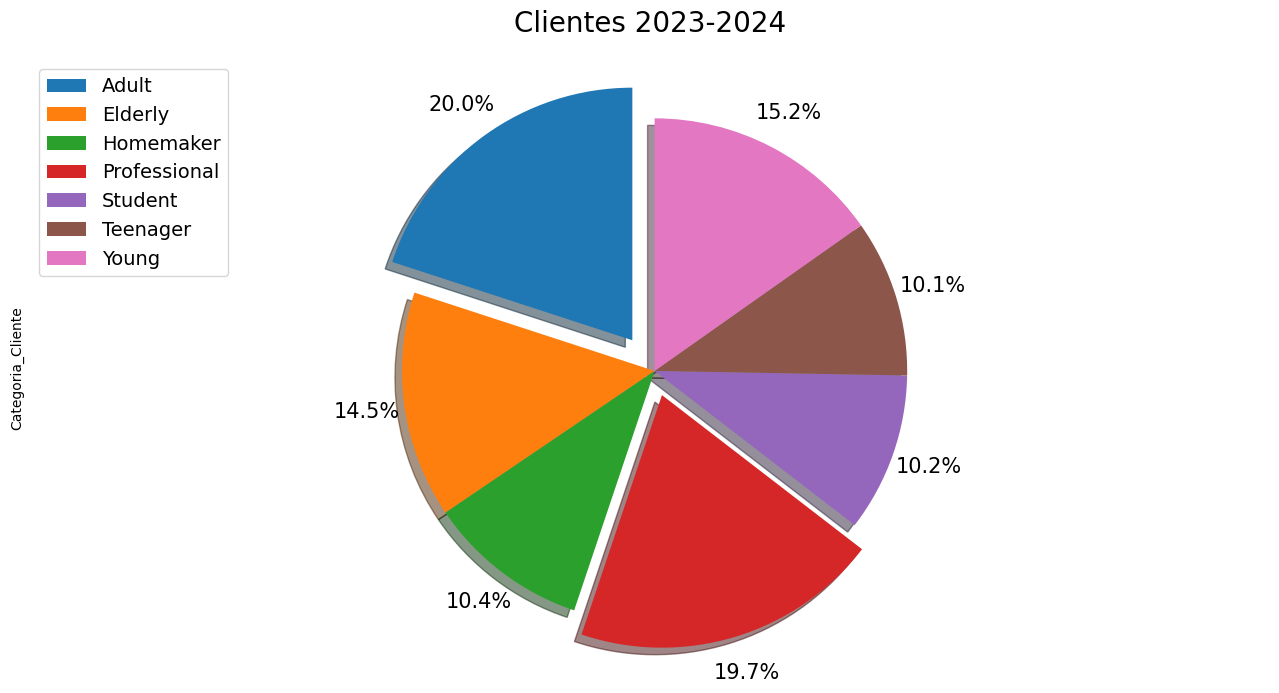

In [14]:
import matplotlib.pyplot as plt


explode_list = [0.15, 0, 0, 0.10, 0, 0, 0] # ratios para alejar las porciones (Customer_Category) del centro.

df_category['Categoria_Cliente'].plot(kind='pie',
                              figsize=(16, 8),      # tamaño de la figura
                              autopct='%1.1f%%',    # formato de los porcentages
                              startangle=90,        # aungulo en el que se muestra el 1er registro (Adulto)
                              shadow=True,          # añade sombra al pie
                              labels=None,          # no muestra etiquetas en el pie
                              fontsize=15,
                              pctdistance=1.15,     # ratio desde el centro hasta el inicio del texto generado por autopct
                              explode=explode_list) # 'explode': aleja las porciones segun la lista especificada explode_list

plt.title('Clientes 2023-2024', pad=20, fontsize=20)  # Titulo del plot
plt.axis('equal')  # Para que el pie sea circular.
plt.legend(labels = serie_category.index, loc='upper left', fontsize=14)  # añade leyenda
plt.show()

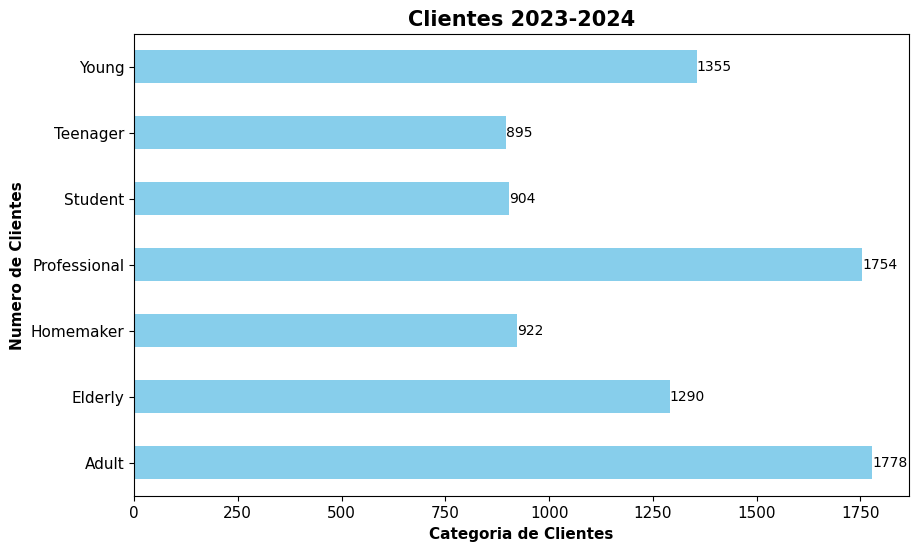

In [15]:
# genera el plot de barras horizontales
serie_category.plot(kind='barh', figsize=(10, 6), fontsize=8, color = "#87CEEB")

plt.xlabel('Categoria de Clientes', fontsize=11, color='black', fontweight='bold')
plt.xticks(fontsize=11)
plt.ylabel('Numero de Clientes', fontsize=11, fontweight='bold')
plt.yticks(fontsize=11)
plt.title('Clientes 2023-2024', fontsize=15, fontweight='bold')

for bar in plt.gca().patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             '{:.0f}'.format(bar.get_width()), ha='left', va='center')

plt.show()

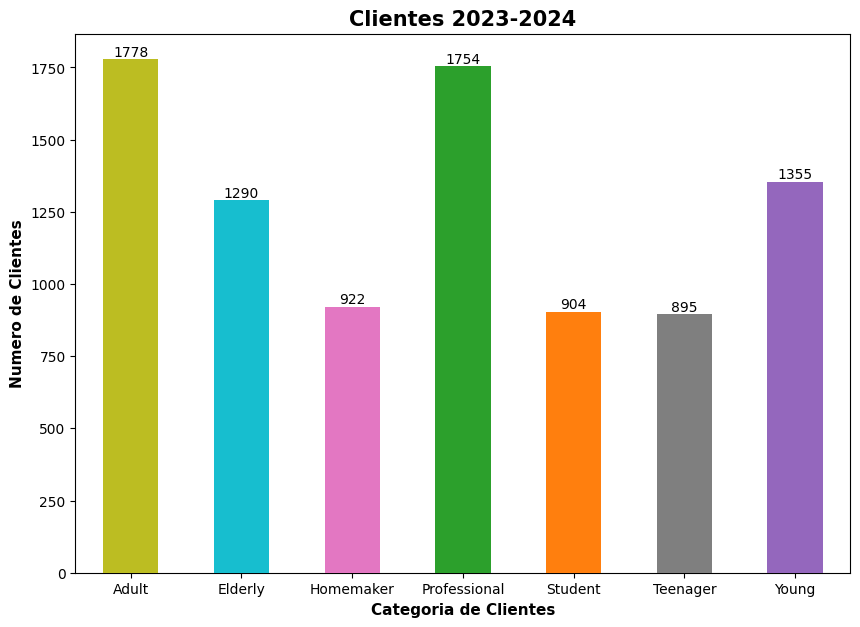

In [16]:
# Plotea el diagra de barras
#colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'lightblue']
colores = ["#bcbd22", "#17becf", "#e377c2",  "#2ca02c", "#ff7f0e", "#7f7f7f", "#9467bd"]
serie_category.plot(kind='bar', figsize=(10, 7), color=colores, zorder=10)


# Coloca etiquetas de ejes y titulo
plt.xlabel('Categoria de Clientes', fontsize=11, color='black', fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Numero de Clientes', fontsize=11, fontweight='bold')
plt.title('Clientes 2023-2024', fontsize=15, fontweight='bold')

# Coloca valores encima de la barra
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             '{:.0f}'.format(bar.get_height()), ha='center', va='bottom')

# coloca grilla
#plt.grid(color='gray', linestyle='--', linewidth=0.5, zorder=-1)

plt.show()  # muestra el plot

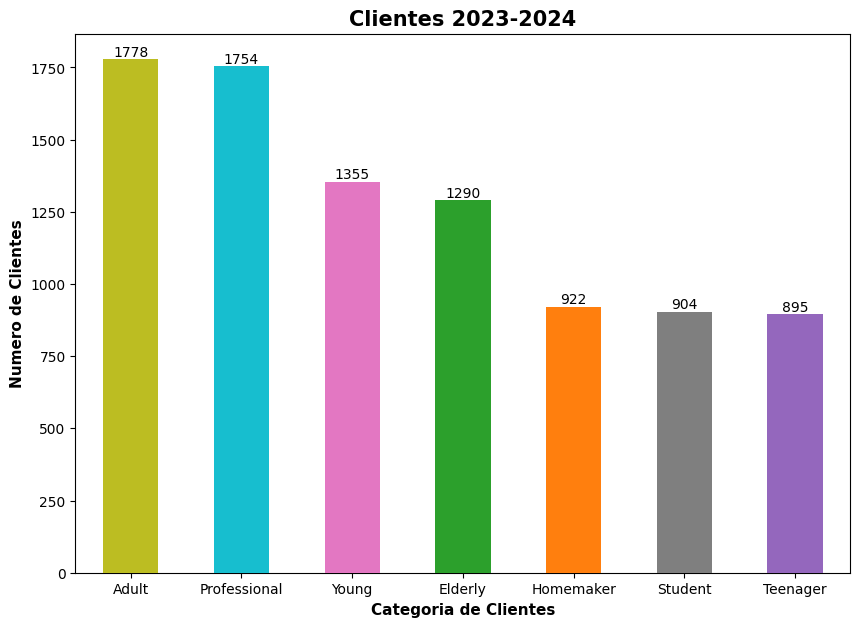

In [17]:
# Plotea el diagra de barras ordenadas:

colores = ["#bcbd22", "#17becf", "#e377c2",  "#2ca02c", "#ff7f0e", "#7f7f7f", "#9467bd"]

# Sort data in descending order
serie_category = serie_category.sort_values(ascending=False)

# Create bar plot
serie_category.plot(kind='bar', figsize=(10, 7), color=colores, zorder=10)

# Coloca etiquetas de ejes y titulo
plt.xlabel('Categoria de Clientes', fontsize=11, color='black', fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Numero de Clientes', fontsize=11, fontweight='bold')
plt.title('Clientes 2023-2024', fontsize=15, fontweight='bold')

# Coloca valores encima de la barra
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             '{:.0f}'.format(bar.get_height()), ha='center', va='bottom')


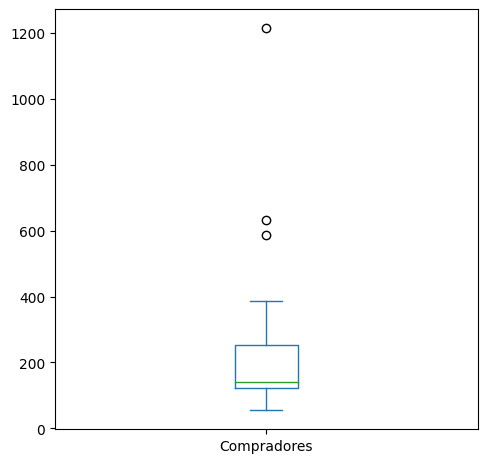

In [18]:
df_estados.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=[12,12])
plt.show()

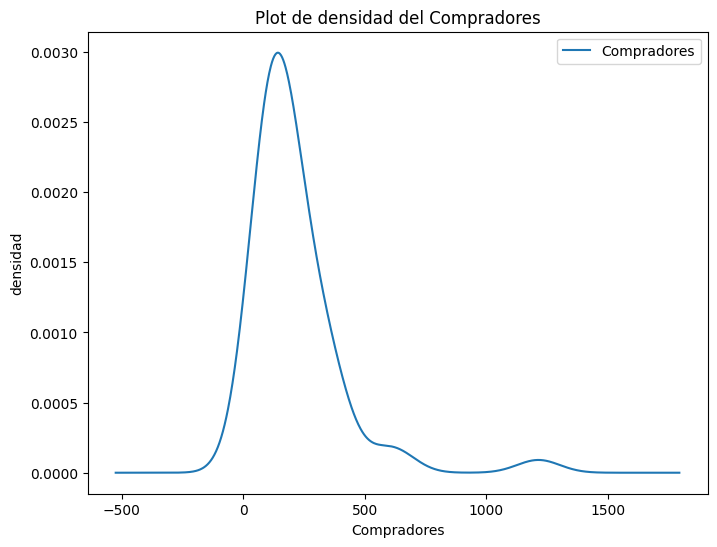

In [19]:
df_estados.plot(kind='density', figsize=(8,6))
plt.title('Plot de densidad del Compradores') # titulo
plt.ylabel('densidad') # etiqueta eje y
plt.xlabel('Compradores') # etiqueta eje x
plt.show()


In [20]:
data.head()

,Customer_Id,DateTime,Customer_Name,Customer_Category,Marital_Status,Age,Gender,Products,Total_Items,Total_Price,Payment_Method,State,Season,PCL
0,9579,2023-09-18 14:43:07,Wanda White,Student,Single,17,Female,Apple,1,0.75,Debit Card,New York,Autumn,False
1,8623,2023-06-02 15:55:11,Holly Zuniga,Adult,Widowed,64,Female,Tacos,1,5.25,Mobile Payment,Utah,Summer,False
2,6334,2024-01-29 09:58:33,Stephen Rivas,Young,Single,22,Female,"Hotdog, Curry",2,10.25,Mobile Payment,Wisconsin,Winter,False
3,6514,2024-02-17 13:43:26,Thomas Holt,Professional,Divorced,26,Male,Rice,1,1.99,Mobile Payment,Vermont,Winter,False
4,6489,2023-10-07 18:33:22,Michael Powell,Adult,Divorced,37,Female,"Steak, Bread",2,15.24,Credit Card,Indiana,Autumn,False


In [21]:
# Preprocess the data
# # - Encode categorical features

data_le = data

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_le['Customer_Name'] = le.fit_transform(data_le['Customer_Name'])
data_le['Customer_Category'] = le.fit_transform(data_le['Customer_Category'])
data_le['Marital_Status'] = le.fit_transform(data_le['Marital_Status'])
data_le['Gender'] = le.fit_transform(data_le['Gender'])
data_le['Products'] = le.fit_transform(data_le['Products'])
data_le['Payment_Method'] = le.fit_transform(data_le['Payment_Method'])
data_le['State'] = le.fit_transform(data_le['State'])
data_le['Season'] = le.fit_transform(data_le['Season'])
data_le['PCL'] = le.fit_transform(data_le['PCL'])
data_le['DateTime'] = le.fit_transform(data_le['DateTime'])

data_le.head()


,Customer_Id,DateTime,Customer_Name,Customer_Category,Marital_Status,Age,Gender,Products,Total_Items,Total_Price,Payment_Method,State,Season,PCL
0,9579,96005,8303,4,2,17,0,0,1,0.75,2,31,0,0
1,8623,36953,3157,0,3,64,0,102947,1,5.25,3,43,2,0
2,6334,168551,7561,6,2,22,0,53657,2,10.25,3,48,3,0
3,6514,178819,7869,3,0,26,1,80748,1,1.99,3,44,3,0
4,6489,106590,5907,0,0,37,0,97743,2,15.24,1,13,0,0


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
np.set_printoptions(precision=2)   # setea numpy para que solo imprima 2 decimales

data_kbest=data_le

# separa atributos del target (class)
array = data_kbest.values # obtiene el array numpy de los datos
X = array[:,0:13]  # obtiene los atributos (8 primeras columnas)
y = array[:,13]    # target (ultima columna)

# define un selector de atributos para obtener 4 atributos mas relevantes segun chi2
selector = SelectKBest(score_func=chi2, k=4)
fit_selector = selector.fit(X, y)  # ajusta el selector con los atributos de entrada X y el target y

# muestra resultados de seleccion
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Scores de Atributos: {}".format(fit_selector.scores_))

# obtiene los atributos seleccionados
X_filtered = fit_selector.transform(X)
print(X_filtered)

Atributos Seleccionados: [1 2 5 7]
Scores de Atributos: [9.73e+00 6.96e+03 7.44e+04 8.68e+00 5.40e-02 2.54e+02 2.01e+00 1.50e+03
 1.55e-02 3.33e-01 6.38e-02 2.60e+00 5.81e-01]
[[9.60e+04 8.30e+03 1.70e+01 0.00e+00]
 [3.70e+04 3.16e+03 6.40e+01 1.03e+05]
 [1.69e+05 7.56e+03 2.20e+01 5.37e+04]
 ...
 [1.28e+05 7.53e+03 1.40e+01 7.20e+03]
 [8.93e+04 4.50e+03 7.70e+01 1.06e+05]
 [6.18e+03 1.20e+03 3.70e+01 2.40e+04]]


TRANSFORMACION DE ATRIBUTOS CON PCA

In [23]:
# importa funcion PCA para hacer la transformacion PCA de los datos
from sklearn.decomposition import PCA

# separa atributos y target (class)
array = data_le.values # obtiene el array numpy de los datos
X = array[:,0:13]  # atributos
y = array[:,13]    # target

# aplica transformacion PCA
pca = PCA(n_components=4) # define el transformador PCA con 4 componentes
fit_pca = pca.fit(X)  # ajusta el transformador PCA con los datos
X_transformed = fit_pca.transform(X) # transforma los atributos (el resultado es un array numpy)

# muestra cuanta varianza explicada hay en cada atributo PCA obtenido
print("Varianza explicada: {}".format(fit_pca.explained_variance_ratio_))

Varianza explicada: [0.76 0.24 0.   0.  ]


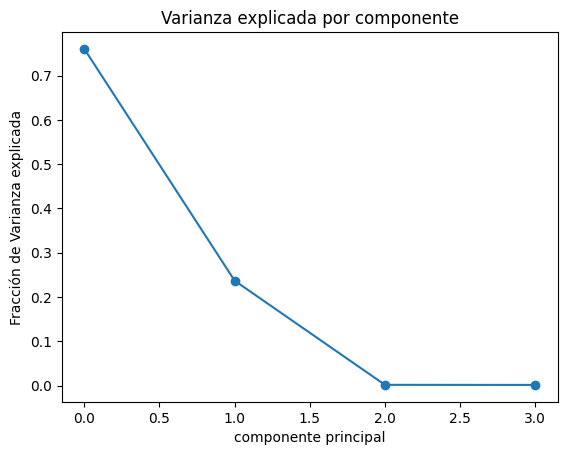

In [24]:
# Plotea la proporcion de varianza explicada por componente
plt.plot( fit_pca.explained_variance_ratio_, marker='o' )  # genera el plot de la varianza explicada
plt.xlabel('componente principal')   # etiqueta de eje x
plt.ylabel('Fracción de Varianza explicada')   # etiqueta de eje y
plt.title('Varianza explicada por componente')  # titulo
plt.show()

In [25]:
# convierte la data transformada en un DataFrame, añade nombre de columnas y la columna 'class'
data_le_pca = pd.DataFrame(X_transformed, columns=['PC0', 'PC1', 'PC2', 'PC3'])
data_le_pca['class'] = data_le['PCL'] # añade columna class
data_le_pca.head()

,PC0,PC1,PC2,PC3,class
0,-3604.093304,-55286.316883,4025.049641,4125.270057,0
1,-62805.484793,47575.020563,3136.543802,-1029.325797,0
2,68864.111312,-1524.201550,792.588401,3336.697855,0
3,79092.838342,25581.651541,968.747721,3646.855472,0
4,6839.183908,42471.947937,967.901310,1688.322036,0


Transformación de Atributos con PCA, estandarizando primero los atributos

In [26]:
# Estandariza los atributos
from sklearn.preprocessing import StandardScaler  # importa libreria StandardScaler

# separa atributos y target (class)
array = data_le.values # obtiene el array numpy de los datos
X = array[:,0:13]  # atributos
y = array[:,13]    # target

# estandariza las columnas de df_customers con StandardScaler. El resultado es un numpy array
X_standardized = StandardScaler().fit_transform(X)
X_standardized

array([[ 1.57, -0.06,  1.67, ..., -0.1 ,  0.49, -1.34],
       [ 1.21, -1.09, -0.44, ...,  0.86,  1.34,  0.45],
       [ 0.32,  1.2 ,  1.36, ...,  0.86,  1.69,  1.35],
       ...,
       [-1.  ,  0.49,  1.35, ..., -2.01, -1.34, -1.34],
       [ 1.18, -0.18,  0.11, ...,  0.86, -1.27, -1.34],
       [-0.92, -1.62, -1.24, ..., -1.05, -0.43, -0.45]])

Varianza expplicada: [0.14 0.13 0.1  0.08]


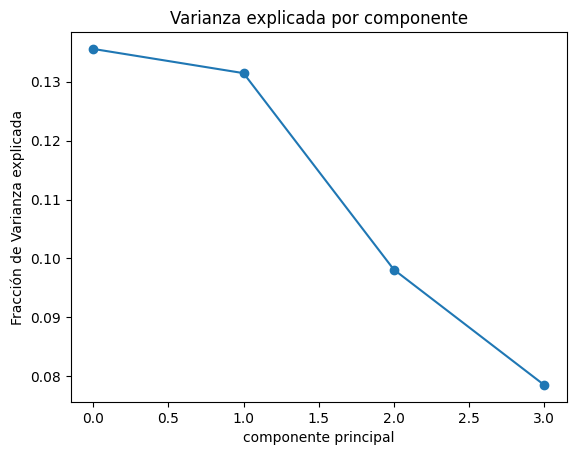

In [27]:
# aplica transformacion PCA en la data estandarizada
pca = PCA(n_components=4) # define el transformador PCA con 4 componentes
fit_pca = pca.fit(X_standardized)  # ajusta el transformador PCA con los datos estandarizados
X_transformed = fit_pca.transform(X_standardized) # transforma los atributos (el resultado es un array numpy)

# muestra cuanta varianza explicada hay en cada atributo PCA obtenido
print("Varianza expplicada: {}".format(fit_pca.explained_variance_ratio_))

# Plotea la proporcion de varianza explicada por componente
plt.plot( fit_pca.explained_variance_ratio_, marker='o' )  # genera el plot de la varianza explicada
plt.xlabel('componente principal')   # etiqueta de eje x
plt.ylabel('Fracción de Varianza explicada')   # etiqueta de eje y
plt.title('Varianza explicada por componente')  # titulo
plt.show()

In [28]:
# convierte la data transformada en un DataFrame, añade nombre de columnas y la columna 'class'
data_le_es_pca = pd.DataFrame(X_transformed, columns=['PC0', 'PC1', 'PC2', 'PC3'])
data_le_es_pca['PCL'] = data_le['PCL'] # añade columna class
data_le_es_pca.head()

,PC0,PC1,PC2,PC3,PCL
0,-2.233037,-1.088947,-0.966831,1.113772,0
1,-1.471986,1.417433,-0.485310,-1.539931,0
2,-0.658522,-1.598620,1.792795,0.112240,0
3,-1.850987,-0.099882,1.928201,1.888706,0
4,-0.078392,1.264158,-0.841894,1.301536,0


In [29]:
# Train a model on the training data
# # - Choose a suitable machine learning model for the task
# # - Train the model on the training data

# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=42)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8943636363636364


In [30]:
# Evaluate the model on the test data
# # - Use the trained model to predict the target variable on the test data
# # - Evaluate the model's performance using appropriate metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's performance using confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

# Evaluate the model's performance using classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)


Accuracy: 0.8943636363636364
Confusion Matrix:
 [[59028     0]
 [ 6972     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     59028
         1.0       0.00      0.00      0.00      6972

    accuracy                           0.89     66000
   macro avg       0.45      0.50      0.47     66000
weighted avg       0.80      0.89      0.84     66000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Improve the model
# # - Try different models
# # - Tune the hyperparameters of the chosen model
# # - Feature engineering

# Try different models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Create different models
models = [
  DecisionTreeClassifier(),
  RandomForestClassifier(),
  SVC(),
]

# Train and evaluate each model
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")

# Tune the hyperparameters of the chosen model
# Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for the chosen model
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 5, 10],
  'min_samples_split': [2, 5, 10],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model.__class__.__name__}, Best Hyperparameters: {best_params}, Accuracy: {accuracy}")

# Feature engineering
# Create new features or transform existing features to improve the performance of the model
# For example, you can create a new feature that is the sum of two existing features
# Or you can transform a categorical feature into a numerical feature using one-hot encoding or label encoding

# After creating new features or transforming existing features, you need to train and evaluate the model again


Model: DecisionTreeClassifier, Accuracy: 0.8350909090909091
Model: RandomForestClassifier, Accuracy: 0.8957424242424242
Model: SVC, Accuracy: 0.8943636363636364
Best Model: DecisionTreeClassifier, Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}, Accuracy: 0.8954848484848484


In [37]:
# Use the best model found by the grid search
best_model = grid_search.best_estimator_

# Create a new record with the same number of features as the training data
#new_record = [7172,	115452,	851,	6,	2,	24,	1,	83603,	3,	28.24,	3,	15,	0]
#new_record = [4589,	123399,	7240,	1,	1,	90,	0,	56479,	4, 11.74,	3,	23,	0]
new_record = [6489,	106590,	5907,	0,	0,	37,	0,	97743,	2,	2.00,	1,	13,	0]

# Transform the new record using the same PCA transformation used on the training data
new_record_transformed = fit_pca.transform([new_record])

# Predict the target variable for the new record
predicted_pcl = best_model.predict(new_record_transformed)[0]

# Print the predicted PCL
print(f"Predicted PCL for the new record: {predicted_pcl}")


Predicted PCL for the new record: 1.0
